In [1]:
# Keras and Tensorflow > 2.0

# 1 . We will collect the Stock Data - AAPL
2 . Preprocess the Data - Train and Test
3 . Create An Stacked LSTM model
4 . Predict the test data and plot the output
5 . Predict the future 30 days and  plot the output

In [16]:
# Data Collection
import pandas_datareader as pdr


In [17]:
# df = pdr.get_data_tiingo('AAPL',api_key=key)
# alternatively ,
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [18]:
df.shape

(1258, 15)

In [19]:
df.head(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.95,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.45,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0


In [20]:
df1 = df.reset_index()['close']

In [21]:
df1.shape

(1258,)

In [22]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

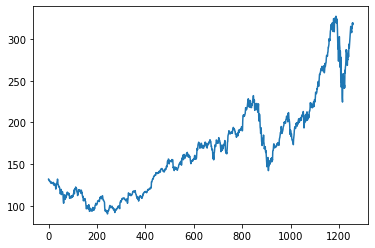

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [24]:
# LSTM are sensitive to the scale of  the data . So we apply MinMax scalar

In [25]:
import numpy as np

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1.shape

(1258, 1)

In [28]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [29]:
# Splitting dataset into train and test
# these data set to be devided based on dates
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
df1.shape

(1258, 1)

In [31]:
train_data.shape

(817, 1)

In [32]:
test_data.shape

(441, 1)

In [34]:
# Convert an array of values into a dataset matrix
import numpy

def create_dataset(dataset,time_step=1):
    dataX,dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a) # Multiple data to dataX
        dataY.append(dataset[i+time_step,0]) # Single data to dataY
    return numpy.array(dataX),numpy.array(dataY)    

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [38]:
X_train.shape

(716, 100)

In [42]:
X_train[1]

array([0.17495567, 0.16862282, 0.1696994 , 0.16727181, 0.16794731,
       0.16473866, 0.16174111, 0.1581525 , 0.15654817, 0.16271215,
       0.1614878 , 0.1554927 , 0.15443722, 0.15730811, 0.15604154,
       0.15849025, 0.15308621, 0.15735033, 0.15490163, 0.15946129,
       0.15688592, 0.1537195 , 0.14434687, 0.14812547, 0.15308621,
       0.15241071, 0.15055307, 0.14924428, 0.13607194, 0.12551718,
       0.13906949, 0.14911762, 0.14890653, 0.15401503, 0.16115005,
       0.16583636, 0.17618002, 0.17060711, 0.14725998, 0.14700667,
       0.14422021, 0.13691632, 0.13949168, 0.13784514, 0.13522756,
       0.13071012, 0.11863548, 0.10259225, 0.1058009 , 0.10466098,
       0.10630752, 0.12403952, 0.09773706, 0.10512539, 0.10474542,
       0.10816516, 0.11323144, 0.11044499, 0.10415435, 0.09419066,
       0.06510175, 0.05395592, 0.0565735 , 0.08169383, 0.09533058,
       0.09689268, 0.09465507, 0.07337668, 0.09288187, 0.08456472,
       0.07992063, 0.09275521, 0.0836359 , 0.09385291, 0.10077

In [41]:
y_train[0]

0.08739339694334208

In [43]:
y_train.shape

(716,)

In [45]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [44]:
X_test.shape,y_test.shape

((340, 100), (340,))

In [46]:
# reshape input to be [samples  , time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) # X_train.shape[1],1 - Will be the input to the LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
X_train[1]

array([[0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.11863548],
       [0.102

In [49]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 378ms/step - loss: 0.0182 - val_loss: 0.0503
Epoch 2/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 217ms/step - loss: 7.8605e-04 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 3s 218ms/step - loss: 6.2753e-04 - val_loss: 0.0057
Epoch 6/100
12/12 [==============================] - 3s 212ms/step - loss: 6.2161e-04 - val_loss: 0.0043
Epoch 7/100
12/12 [==============================] - 3s 210ms/step - loss: 6.0208e-04 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 3s 222ms/step - loss: 6.5177e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 3s 223ms/step - loss: 6.3278e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 3s 218ms/step

In [54]:
import tensorflow as tf

In [55]:
tf.__version__

'2.2.0'

In [58]:
# Let's do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [60]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.74903531233696

In [61]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

237.51212207369989

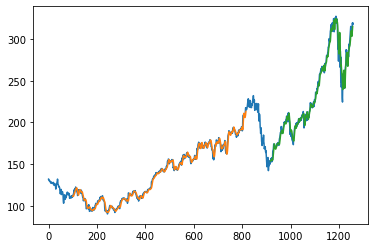

In [62]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_data)

441

In [65]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
x_input.shape

(1, 100)

In [67]:
x_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [68]:
test_data[341:]

array([[0.85835515],
       [0.8866419 ],
       [0.87431394],
       [0.88431985],
       [0.87836697],
       [0.8986321 ],
       [0.92582116],
       [0.92877649],
       [0.95676771],
       [0.93869797],
       [0.93304061],
       [0.94950604],
       [0.96424048],
       [0.95512117],
       [0.95989192],
       [0.96635143],
       [0.96246728],
       [0.92295027],
       [0.9598497 ],
       [0.98792536],
       [0.98594106],
       [0.92531453],
       [0.92172591],
       [0.96474711],
       [0.97572406],
       [0.99159841],
       [0.96972895],
       [0.97614625],
       [0.96795575],
       [1.        ],
       [0.99016297],
       [0.99050072],
       [0.96538039],
       [0.98488559],
       [0.97086887],
       [0.94026007],
       [0.87748037],
       [0.83483915],
       [0.85413324],
       [0.77336823],
       [0.77269273],
       [0.88014017],
       [0.84007431],
       [0.89673225],
       [0.85527316],
       [0.83884995],
       [0.74233725],
       [0.823

In [69]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [70]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [71]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95738095]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

10 day output [[0.94187963]]
11 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.940640

19 day output [[0.94373363]]
20 day input [0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.95738095 0.95319515 0.94675863 0.94053763
 0.93572068 0.93282908

27 day output [[0.95076567]]
28 day input [0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.95738095 0.95319515 0.94675863 0.94053763 0.93572068 0.93282908
 0.93198186 0.93297702 0.93536288 0.93853992 0.94187963 0.94483089
 0.94699919 0.948191

In [85]:
len(lst_output)

30

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [73]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [74]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [75]:
import matplotlib.pyplot as plt

In [76]:
len(df1)

1258

In [77]:
df3=df1.tolist()

In [80]:
len(df3)

1258

In [81]:
df3

[[0.1760744743730473],
 [0.17495567001604323],
 [0.16862281516507643],
 [0.1696994004897408],
 [0.1672718061302036],
 [0.16794731064763996],
 [0.1647386641898168],
 [0.16174111289369247],
 [0.15815249514481128],
 [0.1565481719158997],
 [0.16271215063750738],
 [0.16148779869965385],
 [0.1554926961074053],
 [0.15443722029891077],
 [0.15730811449801568],
 [0.15604154352782235],
 [0.15849024740352952],
 [0.15308621126403782],
 [0.1573503335303555],
 [0.15490162965464832],
 [0.15946128514734453],
 [0.15688592417461794],
 [0.1537194967491345],
 [0.14434687156970366],
 [0.14812547496411382],
 [0.15308621126403782],
 [0.15241070674660134],
 [0.15055306932365115],
 [0.149244279321118],
 [0.13607194123110694],
 [0.12551718314616228],
 [0.13906949252723128],
 [0.14911762222409858],
 [0.14890652706239976],
 [0.15401502997551292],
 [0.1611500464409355],
 [0.16583635903065103],
 [0.17618002195389676],
 [0.17060710968504605],
 [0.14725998480114838],
 [0.14700667060710965],
 [0.14422021447268435],
 [0

In [82]:
df3.extend(lst_output)

In [83]:
len(df3)

1288

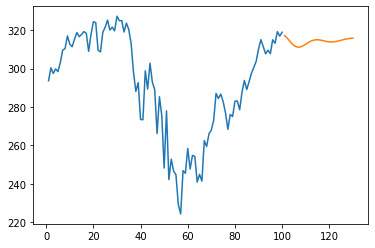

In [84]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))